# IMPORT, EXPLORE,  DROP,  RENAME COLUMNS

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('/Users/admin/Documents/Flatiron/Movie_Production_Recommendations/Lou/data/CSV_DB_Merge.csv')

In [3]:
df.drop(['id_x', 'genre_ids', 'bin'], axis=1, inplace=True)

In [4]:
df.drop(['Unnamed: 0', 'Unnamed: 0_x', 'vote_average', 'vote_count'], axis=1, inplace=True)

In [5]:
df.drop(['popularity', 'release_date_x', 'popularity', 'movie'], axis=1, inplace=True)

In [6]:
df.drop(['title_x', 'id_y', 'title_y'], axis=1, inplace=True)

In [7]:
df.drop(['domestic_gross_x'], axis=1, inplace=True)

In [8]:
df.drop(['year', 'worldwide_gross', 'start_year'], axis=1, inplace=True)

In [9]:
df = df.rename(columns={'domestic_gross_y': 'domestic_gross', 'averagerating	': 'average_rating'})

In [10]:
df['production_budget'] = df['production_budget'].str.replace(',', '')
df['production_budget'] = df['production_budget'].str.replace('$', '')
df['production_budget'] = df['production_budget'].astype(float)

In [11]:
df['domestic_gross'] = df['domestic_gross'].astype(float)
df['foreign_gross'] = df['foreign_gross'].astype(float)

In [12]:
df.set_index('movie_id')

,original_language,original_title,release_year,release_date_y,production_budget,studio,domestic_gross,foreign_gross,Unnamed: 0_y,averagerating,numvotes,primary_title,runtime_minutes,genres
movie_id,,,,,,,,,,,,,,
tt0892769,en,How to Train Your Dragon,2010,2010-03-26,165000000.0,P/DW,217600000.0,277300000.0,13587.0,8.1,611299.0,How to Train Your Dragon,98.0,"Action,Adventure,Animation"
tt1228705,en,Iron Man 2,2010,2010-05-07,170000000.0,Par.,312400000.0,311500000.0,760.0,7.0,657690.0,Iron Man 2,124.0,"Action,Adventure,Sci-Fi"
tt1375666,en,Inception,2010,2010-07-16,160000000.0,WB,292600000.0,535700000.0,63498.0,8.8,1841066.0,Inception,148.0,"Action,Adventure,Sci-Fi"
tt0435761,en,Toy Story 3,2010,2010-06-18,200000000.0,BV,415000000.0,652000000.0,51135.0,8.3,682218.0,Toy Story 3,103.0,"Adventure,Animation,Comedy"
tt1323594,en,Despicable Me,2010,2010-07-09,69000000.0,Uni.,251500000.0,291600000.0,1511.0,7.7,464511.0,Despicable Me,95.0,"Animation,Comedy,Family"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt7334528,en,Uncle Drew,2018,2018-06-29,18000000.0,LG/S,42500000.0,4200000.0,3647.0,5.7,9739.0,Uncle Drew,103.0,"Comedy,Sport"
tt1389072,en,Downsizing,2017,2017-12-22,68000000.0,Par.,24400000.0,30600000.0,8741.0,5.7,74815.0,Downsizing,135.0,"Drama,Sci-Fi"
tt6421110,en,Proud Mary,2018,2018-01-12,30000000.0,SGem,20900000.0,876000.0,15282.0,4.9,6805.0,Proud Mary,89.0,"Action,Crime,Drama"


In [13]:
df['domestic_gross'].isna().any()

False

In [14]:
cols = df.columns.tolist()
cols

['original_language',
 'original_title',
 'release_year',
 'release_date_y',
 'production_budget',
 'studio',
 'domestic_gross',
 'foreign_gross',
 'Unnamed: 0_y',
 'movie_id',
 'averagerating',
 'numvotes',
 'primary_title',
 'runtime_minutes',
 'genres']

In [15]:
cols = ['movie_id', 'primary_title', 'original_title', 'genres', 'release_year', 'release_date_y', 'studio', 'domestic_gross', 'foreign_gross', 'production_budget', 'runtime_minutes', 'averagerating', 'numvotes', 'original_language']  

In [16]:
df = df[cols]

In [17]:
df
import numpy as np

# EXPLORING FOREIGN GROSS, CREATING FOREIGN- AND DOMESTIC-DOMINATED DATAFRAMES

In [19]:
df['foreign_gross'].isna().sum()

0

In [22]:
df['foreign_gross'].sample(100)

847    507100000.0
379       661000.0
557     42400000.0
297    138300000.0
422     64200000.0
          ...     
153    193900000.0
518    201600000.0
690      1900000.0
208    296400000.0
303    236300000.0
Name: foreign_gross, Length: 100, dtype: float64

In [25]:
test = df[df['foreign_gross'] > df['domestic_gross']]

In [26]:
world_gross = test['domestic_gross'] + test['foreign_gross']

test['world_gross'] = world_gross 

<ipython-input-26-ee6c99b04a59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['world_gross'] = world_gross


In [29]:
net = test['world_gross'] - test['production_budget']

test['net'] = net

<ipython-input-29-648900c9407d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['net'] = net


In [30]:
foreign_gt_domestic = test

In [32]:
grouped = foreign_gt_domestic.groupby('net')

In [33]:
foreign_gt_domestic['net'].mean()

181817783.9967213

In [34]:
foreign_gt_domestic['net'].median()

91650000.0

In [35]:
foreign_gt_domestic['net'].describe()

count    6.100000e+02
mean     1.818178e+08
std      2.316490e+08
min     -7.380500e+07
25%      1.920000e+07
50%      9.165000e+07
75%      2.511250e+08
max      1.139500e+09
Name: net, dtype: float64

In [36]:
world_gross = df['domestic_gross'] + df['foreign_gross']

df['world_gross'] = world_gross


In [37]:
net = df['world_gross'] - df['production_budget']

df['net'] = net

In [38]:
df['net'].mean()

127404549.26493624

In [39]:
df['net'].mean() - foreign_gt_domestic['net'].mean()

-54413234.73178506

In [40]:
181817783 - 127404549 

54413234

In [41]:
domestic_gt_foreign =  df[df.domestic_gross.gt(df.foreign_gross)]

In [42]:
domestic_gt_foreign['net'].mean()

59703807.948247425

In [43]:
181817783 - 59703807 

122113976

In [44]:
domestic_gt_foreign['net'].describe()

count    4.850000e+02
mean     5.970381e+07
std      1.085112e+08
min     -1.110000e+08
25%      5.900000e+06
50%      2.950000e+07
75%      7.470000e+07
max      1.147000e+09
Name: net, dtype: float64

In [45]:
domestic_gt_foreign.describe()

,release_year,domestic_gross,foreign_gross,production_budget,runtime_minutes,averagerating,numvotes,world_gross,net
count,485.000000,4.850000e+02,4.850000e+02,4.850000e+02,456.000000,456.000000,456.000000,4.850000e+02,4.850000e+02
mean,2013.816495,5.852792e+07,3.273315e+07,3.155727e+07,107.774123,6.411623,103413.184211,9.126108e+07,5.970381e+07
std,2.581189,7.956008e+07,5.831453e+07,3.647356e+07,15.231383,0.910704,114103.443495,1.298085e+08,1.085112e+08
min,2010.000000,1.010000e+05,6.000000e+02,1.000000e+05,63.000000,1.600000,94.000000,1.174000e+05,-1.110000e+08
25%,2012.000000,1.950000e+07,5.200000e+06,1.000000e+07,96.000000,5.900000,30542.000000,2.560000e+07,5.900000e+06
50%,2014.000000,3.770000e+07,1.700000e+07,2.500000e+07,107.000000,6.400000,69605.000000,5.710000e+07,2.950000e+07
75%,2016.000000,6.600000e+07,3.730000e+07,3.800000e+07,118.000000,7.100000,127261.750000,1.071000e+08,7.470000e+07
max,2018.000000,7.001000e+08,6.469000e+08,3.000000e+08,165.000000,8.500000,795227.000000,1.347000e+09,1.147000e+09


In [46]:
foreign_gt_domestic

,movie_id,primary_title,original_title,genres,release_year,release_date_y,studio,domestic_gross,foreign_gross,production_budget,runtime_minutes,averagerating,numvotes,original_language,world_gross,net
0,tt0892769,How to Train Your Dragon,How to Train Your Dragon,"Action,Adventure,Animation",2010,2010-03-26,P/DW,217600000.0,277300000.0,165000000.0,98.0,8.1,611299.0,en,4.949000e+08,329900000.0
2,tt1375666,Inception,Inception,"Action,Adventure,Sci-Fi",2010,2010-07-16,WB,292600000.0,535700000.0,160000000.0,148.0,8.8,1841066.0,en,8.283000e+08,668300000.0
3,tt0435761,Toy Story 3,Toy Story 3,"Adventure,Animation,Comedy",2010,2010-06-18,BV,415000000.0,652000000.0,200000000.0,103.0,8.3,682218.0,en,1.067000e+09,867000000.0
4,tt1323594,Despicable Me,Despicable Me,"Animation,Comedy,Family",2010,2010-07-09,Uni.,251500000.0,291600000.0,69000000.0,95.0,7.7,464511.0,en,5.431000e+08,474100000.0
5,tt1001526,Megamind,Megamind,"Action,Animation,Comedy",2010,2010-11-05,P/DW,148400000.0,173500000.0,130000000.0,95.0,7.3,207488.0,en,3.219000e+08,191900000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,NaN,NaN,The Sisters Brothers,NaN,2018,2018-09-21,Annapurna,3100000.0,10000000.0,38000000.0,NaN,NaN,NaN,en,1.310000e+07,-24900000.0
1082,tt1981128,Geostorm,Geostorm,"Action,Sci-Fi,Thriller",2017,2017-10-20,WB,33700000.0,187900000.0,100000000.0,109.0,5.3,78287.0,en,2.216000e+08,121600000.0
1086,tt2296777,Sherlock Gnomes,Sherlock Gnomes,"Adventure,Animation,Comedy",2018,2018-03-23,Par.,43200000.0,47100000.0,59000000.0,86.0,5.1,8030.0,en,9.030000e+07,31300000.0
1094,tt1389072,Downsizing,Downsizing,"Drama,Sci-Fi",2017,2017-12-22,Par.,24400000.0,30600000.0,68000000.0,135.0,5.7,74815.0,en,5.500000e+07,-13000000.0


In [47]:
foreign_gt_domestic.describe()

,release_year,domestic_gross,foreign_gross,production_budget,runtime_minutes,averagerating,numvotes,world_gross,net
count,610.000000,6.100000e+02,6.100000e+02,6.100000e+02,553.000000,556.000000,5.560000e+02,6.100000e+02,6.100000e+02
mean,2013.737705,8.660401e+07,1.695828e+08,7.436900e+07,112.491863,6.588849,2.016425e+05,2.561868e+08,1.818178e+08
std,2.533854,9.761743e+07,1.863598e+08,6.711418e+07,19.061600,0.988812,2.090197e+05,2.771217e+08,2.316490e+08
min,2010.000000,1.000000e+03,1.430000e+05,5.000000e+05,41.000000,3.200000,6.000000e+00,1.721000e+05,-7.380500e+07
25%,2011.000000,1.760000e+07,3.735000e+07,2.000000e+07,98.000000,6.075000,6.904725e+04,5.520000e+07,1.920000e+07
50%,2014.000000,5.185000e+07,9.660000e+07,5.000000e+07,109.000000,6.600000,1.279225e+05,1.500500e+08,9.165000e+07
75%,2016.000000,1.218250e+08,2.372750e+08,1.142500e+08,124.000000,7.300000,2.697850e+05,3.532750e+08,2.511250e+08
max,2018.000000,6.086000e+08,9.464000e+08,4.106000e+08,180.000000,8.800000,1.841066e+06,1.405400e+09,1.139500e+09


In [48]:
foreign_gt_domestic['net'].sort_values(ascending=False).sample(50)

570      19300000.0
60      178300000.0
525     476500000.0
158     420400000.0
46       40100000.0
161     515600000.0
959      -8900000.0
513     547800000.0
935      14500000.0
1061      4700000.0
670     -12700000.0
212      19300000.0
740     725100000.0
52       17112350.0
945      27300000.0
398     494600000.0
675      -8000000.0
1007    352200000.0
298     151100000.0
757      13500000.0
688     -15800000.0
439      76100000.0
14      169700000.0
850     -11300000.0
833      66300000.0
1056    147200000.0
1082    121600000.0
98       -1300000.0
693      18000000.0
422      35400000.0
671      28500000.0
245      -7200000.0
966     -13000000.0
886     632100000.0
739     903300000.0
73       91399999.0
997     669000000.0
727      -7182500.0
638     397900000.0
264      15400000.0
282     501100000.0
1052     82600000.0
895     338700000.0
285     771100000.0
1026      7100000.0
556     108700000.0
111      55200000.0
637     493400000.0
24       72800000.0
616     389300000.0


In [49]:
df['world_gross'].describe()

count    1.098000e+03
mean     1.827400e+08
std      2.383896e+08
min      1.174000e+05
25%      3.592500e+07
50%      8.950000e+07
75%      2.187000e+08
max      1.405400e+09
Name: world_gross, dtype: float64

In [50]:
# what are qualities of the foreign-dominated films? and of the domestic-dominated? what are their respective genres? 


In [51]:
df['net'].sort_values(ascending=False).head(100)

993     1.147000e+09
1002    1.139500e+09
402     1.126400e+09
704     1.085400e+09
614     1.074800e+09
            ...     
1009    4.329000e+08
924     4.261000e+08
784     4.261000e+08
250     4.250000e+08
546     4.234000e+08
Name: net, Length: 100, dtype: float64

In [52]:
df[df['primary_title'].str.contains('broken', na=False)]

,movie_id,primary_title,original_title,genres,release_year,release_date_y,studio,domestic_gross,foreign_gross,production_budget,runtime_minutes,averagerating,numvotes,original_language,world_gross,net
567,tt1809398,Unbroken,Unbroken,"Biography,Drama,Sport",2014,2014-12-25,Uni.,115600000.0,47800000.0,65000000.0,137.0,7.2,129981.0,en,163400000.0,98400000.0


In [53]:
df.columns

Index(['movie_id', 'primary_title', 'original_title', 'genres', 'release_year',
       'release_date_y', 'studio', 'domestic_gross', 'foreign_gross',
       'production_budget', 'runtime_minutes', 'averagerating', 'numvotes',
       'original_language', 'world_gross', 'net'],
      dtype='object')

# PLOTTING FOREIGN GROSS-DOMINATED VS DOMESTIC-GROSS DOMINATED

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

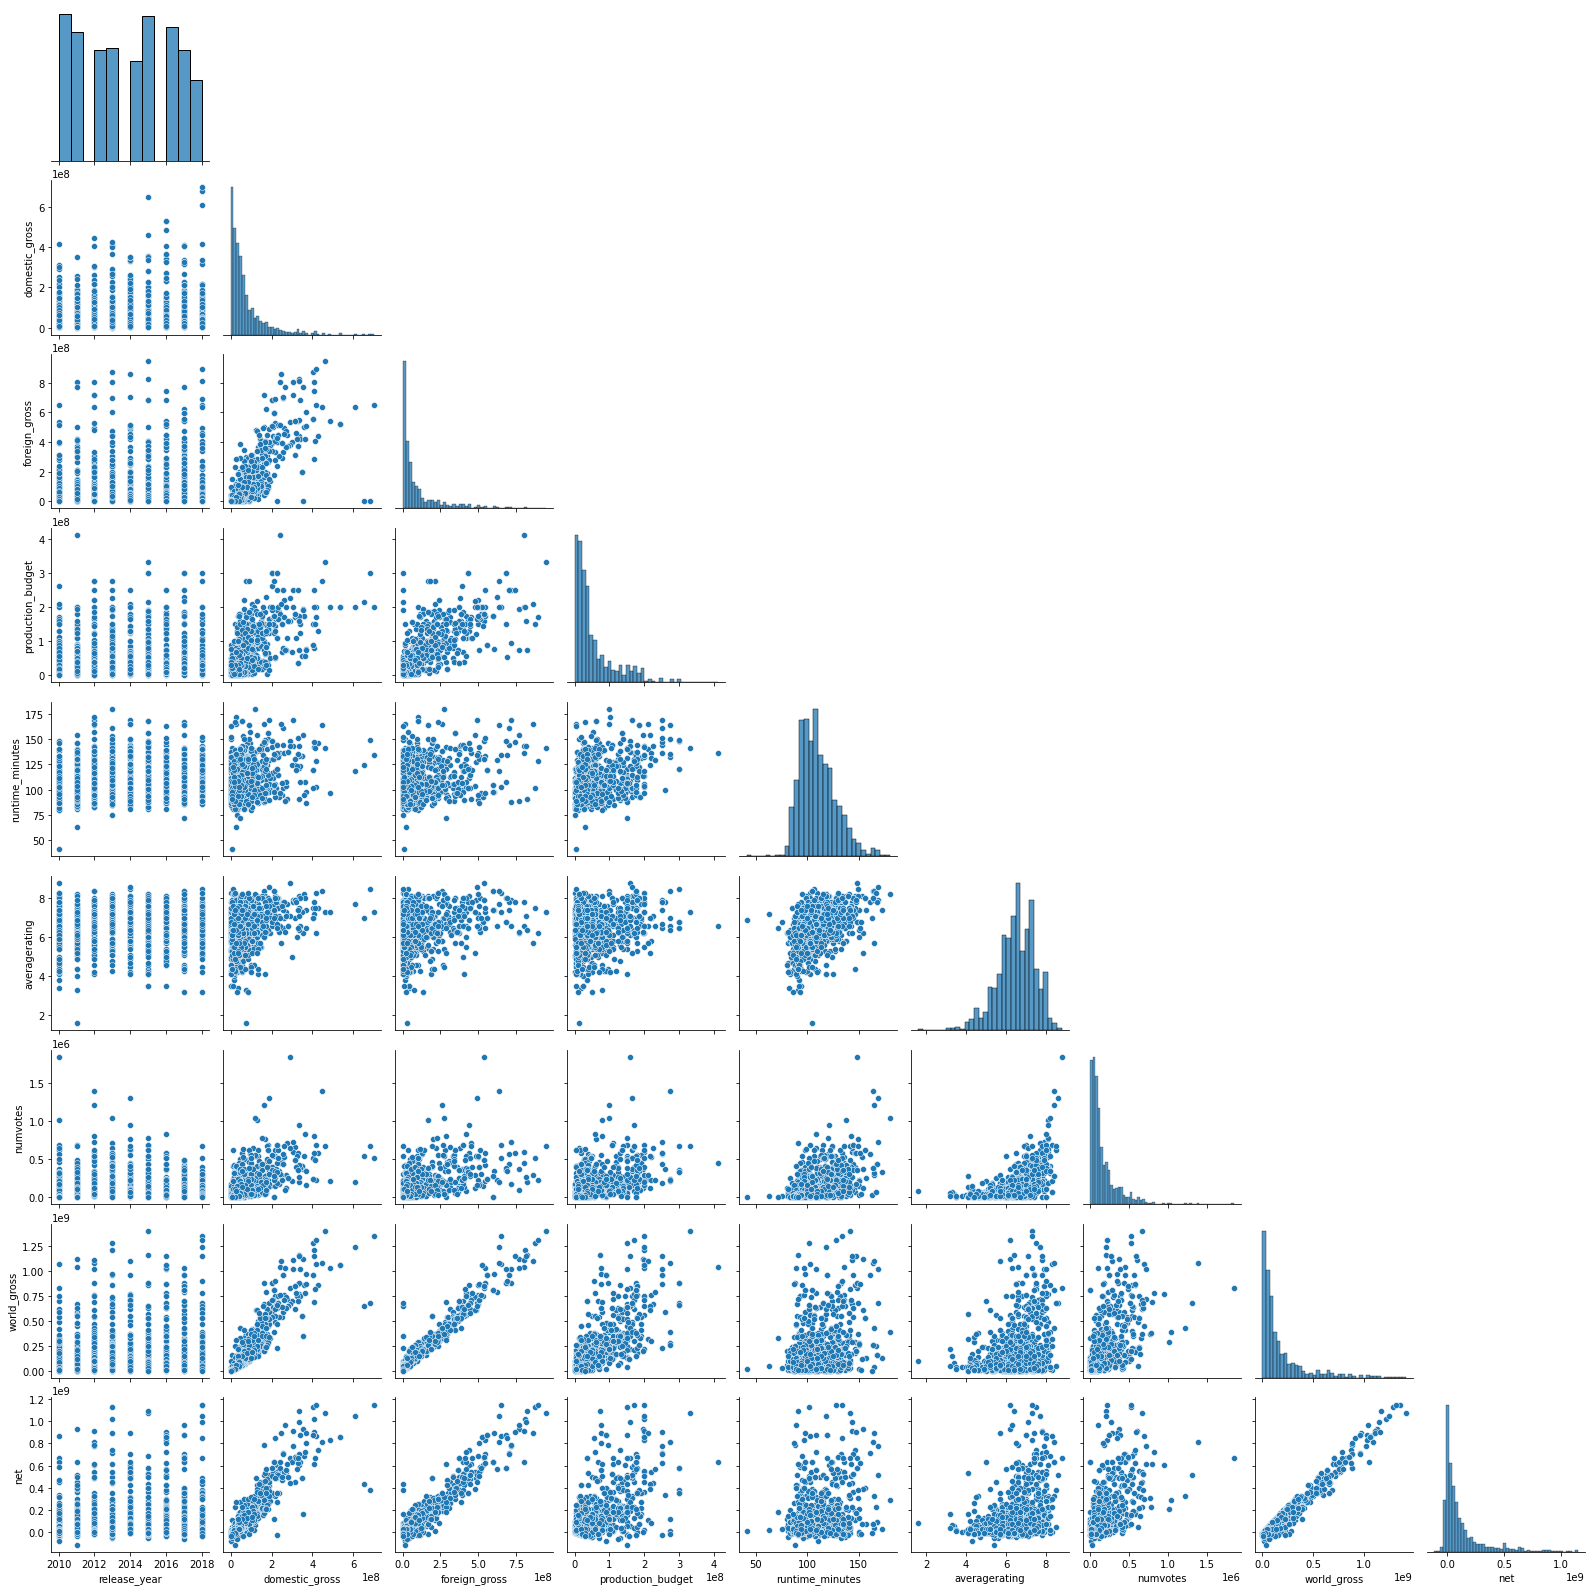

In [55]:
sns.pairplot(df, corner = True)
plt.show()

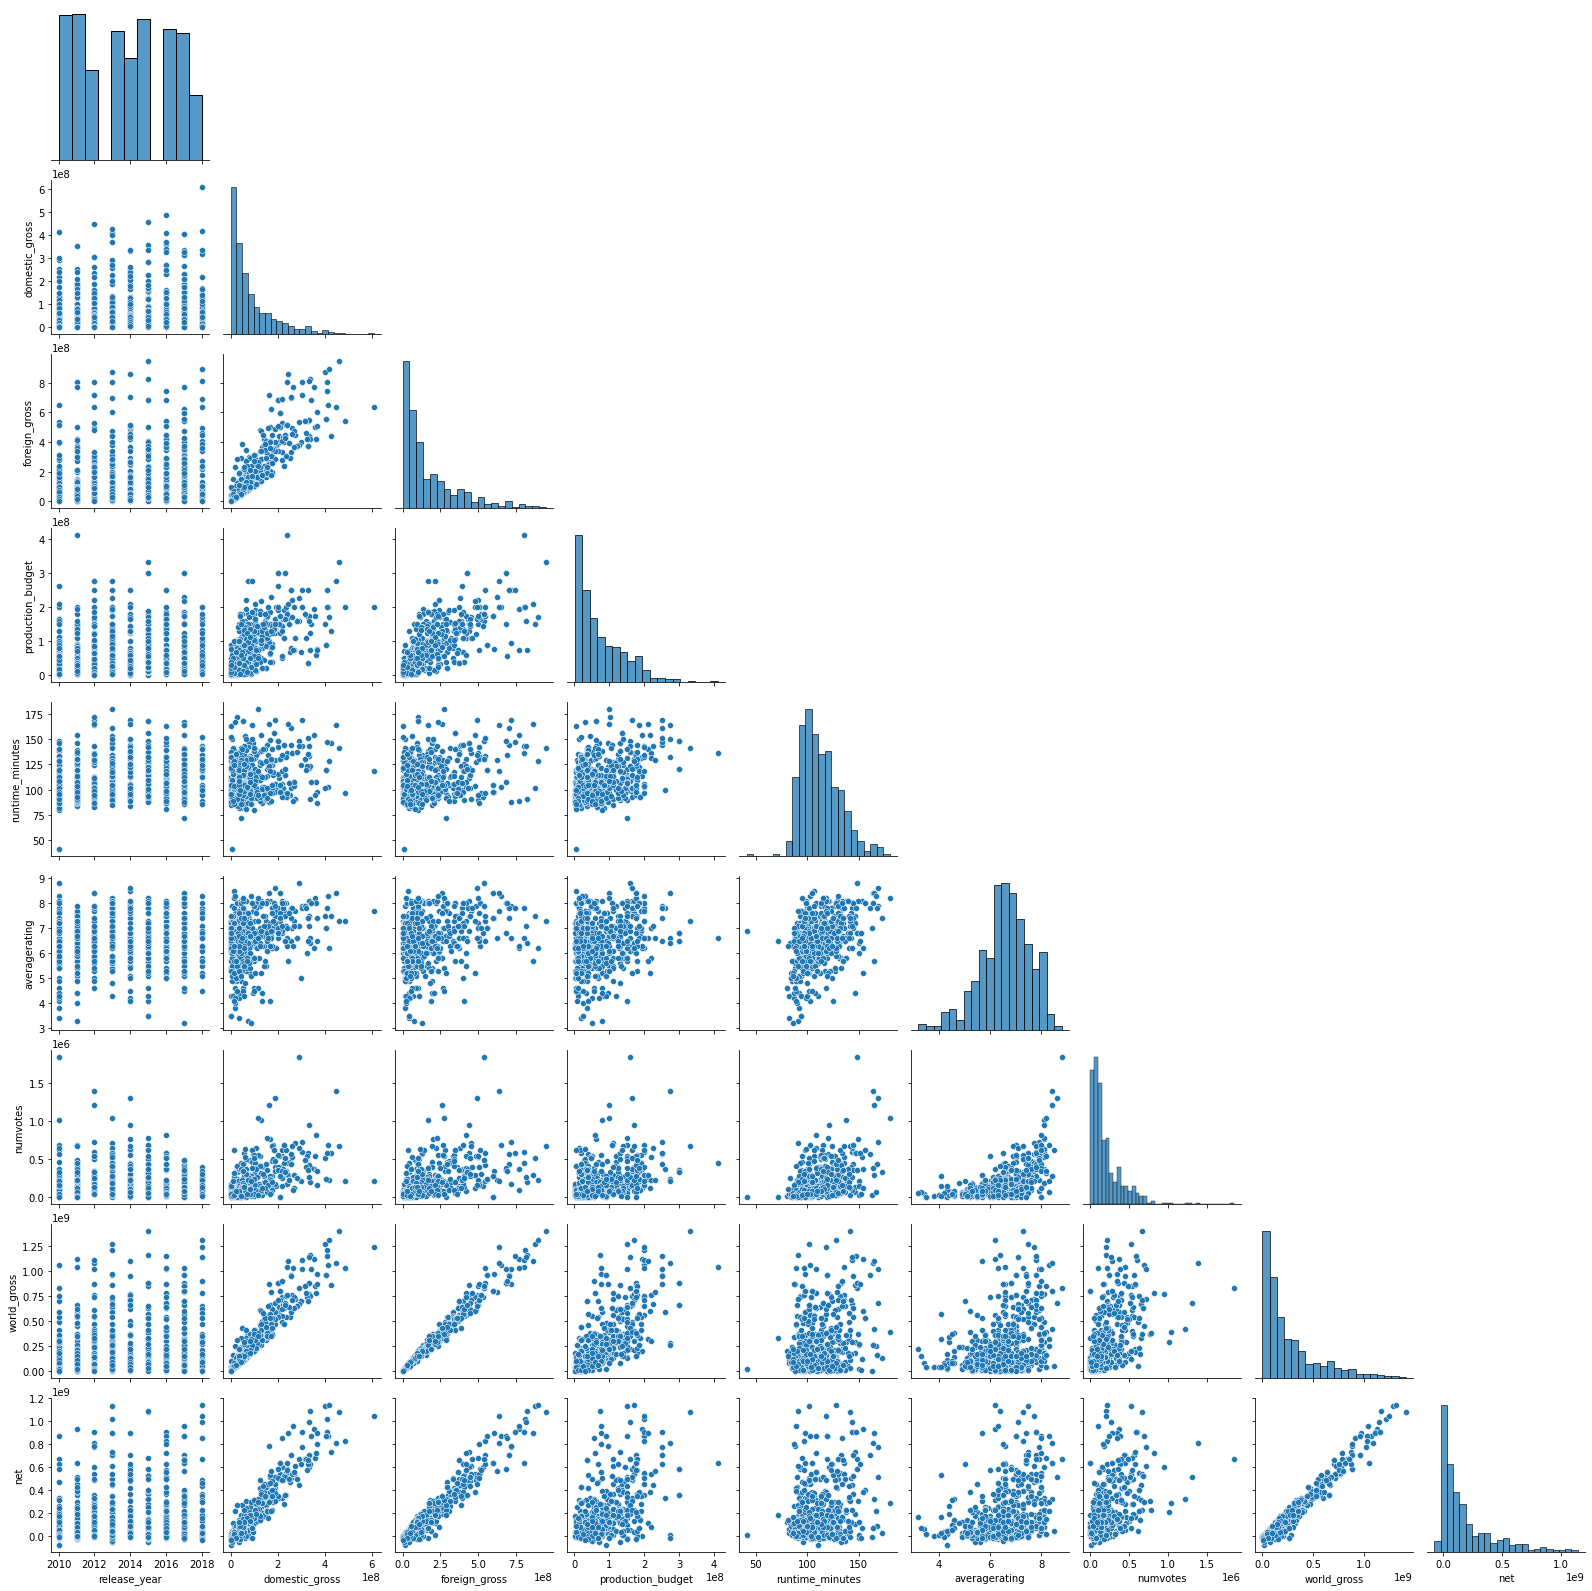

In [56]:
sns.pairplot(foreign_gt_domestic, corner=True)

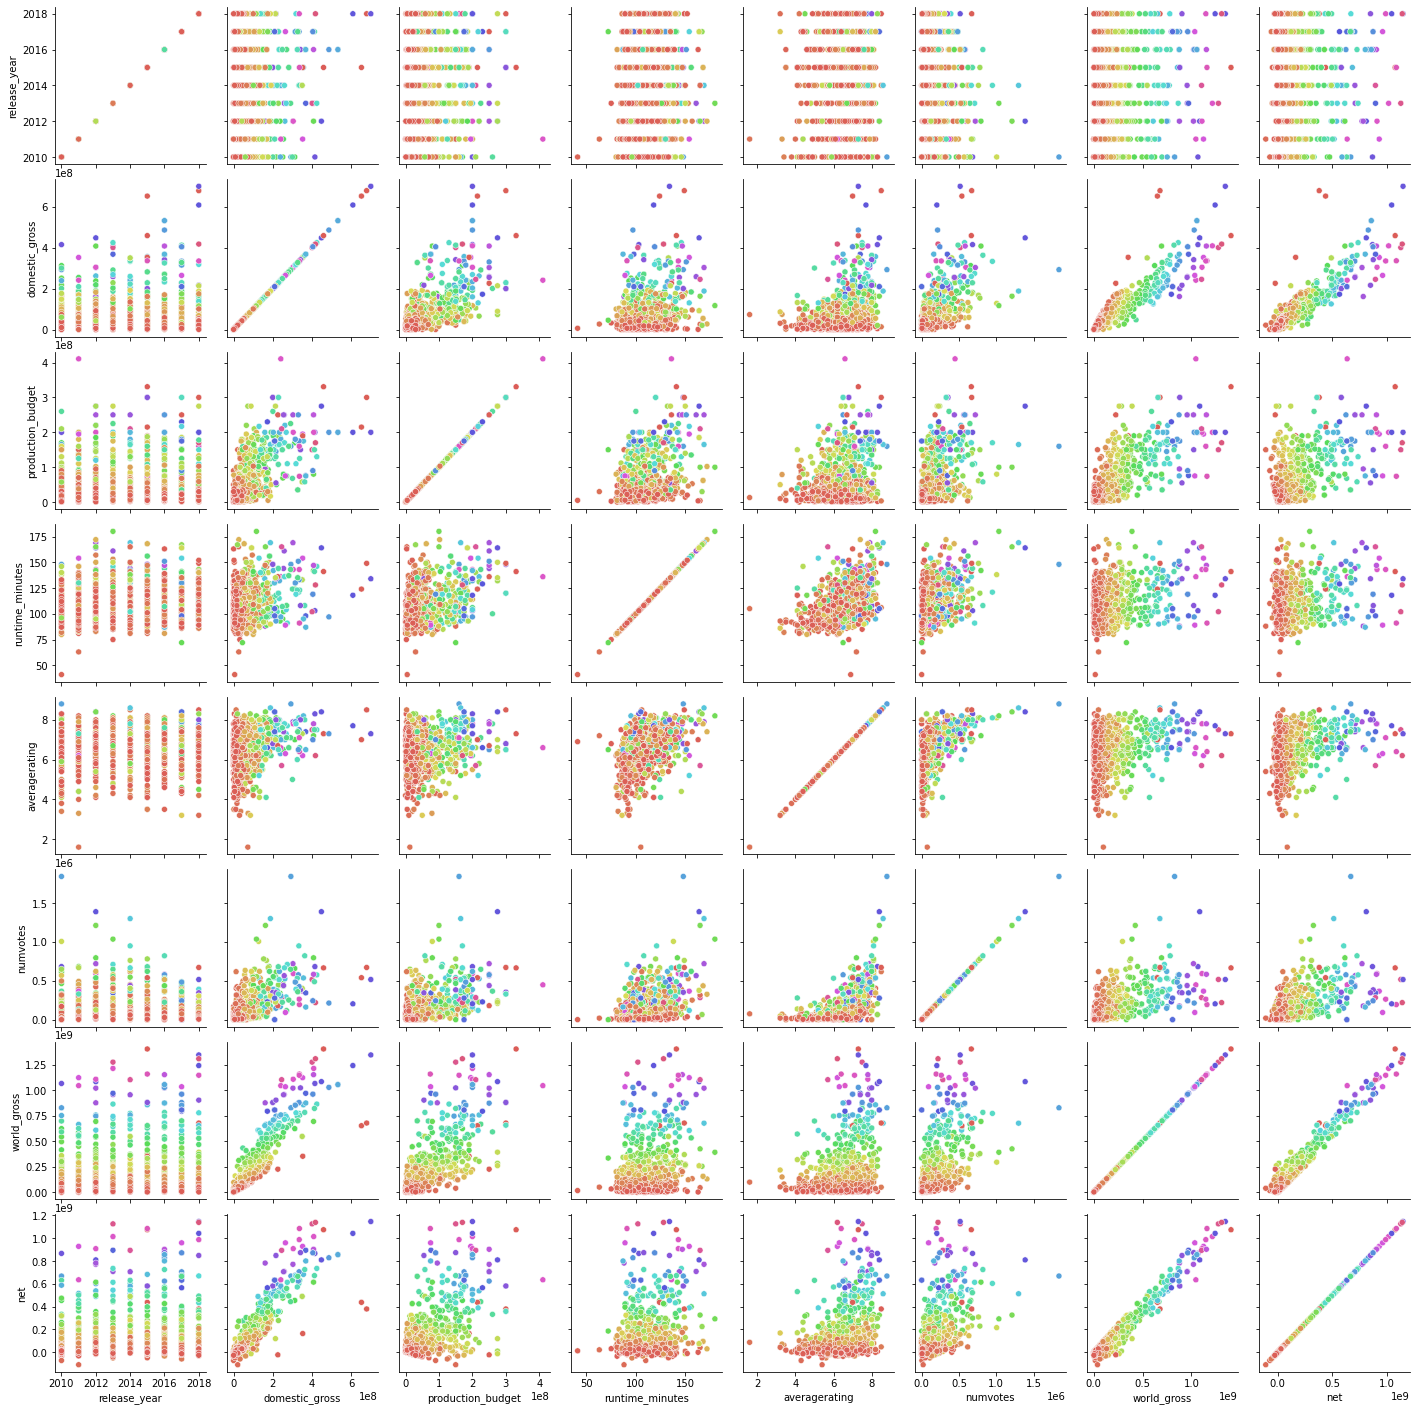

In [58]:
sns.PairGrid(df, hue='foreign_gross', palette='hls').map(sns.scatterplot)
pls.show()


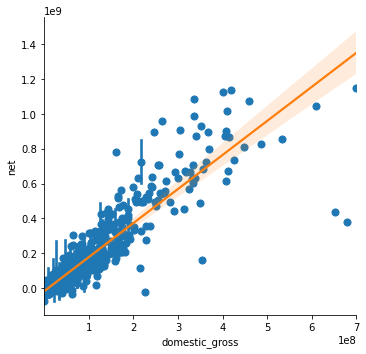

In [61]:
sns.lmplot(x="domestic_gross", y="net", line_kws={"color": "C1"}, data=df, x_estimator=np.mean);

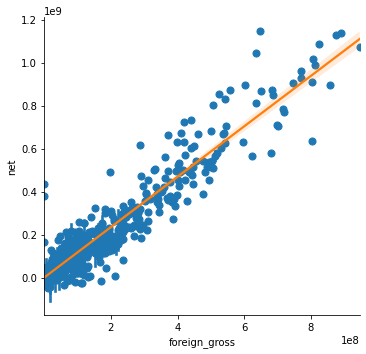

In [62]:
sns.lmplot(x="foreign_gross", y="net", line_kws={"color": "C1"}, data=df, x_estimator=np.mean);

In [66]:
foreign_vs_domestic = df.foreign_gross.gt(df.domestic_gross)

df['foreign_vs_domestic'] = foreign_vs_domestic 

df['foreign_vs_domestic']

0        True
1       False
2        True
3        True
4        True
        ...  
1093    False
1094     True
1095    False
1096    False
1097     True
Name: foreign_vs_domestic, Length: 1098, dtype: bool

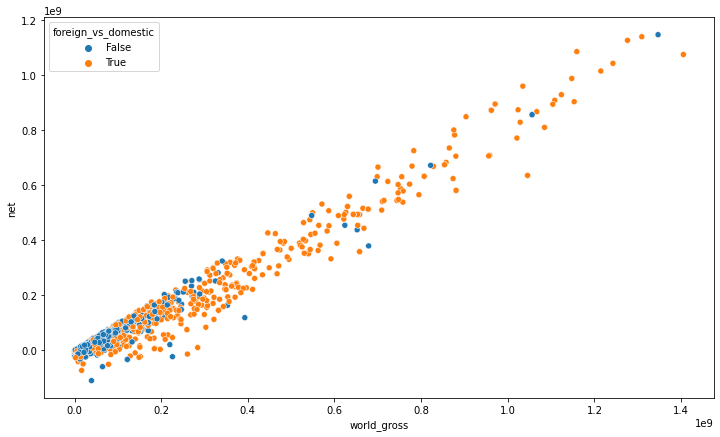

In [67]:
fig, ax = plt.subplots(figsize=(12,7))
sns.scatterplot(x='world_gross', y='net', hue='foreign_vs_domestic', data=df)
plt.show()

In [69]:
foreign_gross_mean = foreign_gt_domestic['world_gross'].mean()
domestic_gross_mean = domestic_gt_foreign['world_gross'].mean()

foreign_gross_mean

256186780.14426228

In [70]:
foreign_gt_domestic.foreign_gross.max()

946400000.0

In [71]:
foreign_gt_domestic['bin'] = pd.cut(foreign_gt_domestic['world_gross'], bins=range(0,946400000,94640000))
foreign_gt_domestic['bin']

<ipython-input-71-f94c0cffc80e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreign_gt_domestic['bin'] = pd.cut(foreign_gt_domestic['world_gross'], bins=range(0,946400000,94640000))


0       (473200000.0, 567840000.0]
2       (757120000.0, 851760000.0]
3                              NaN
4       (473200000.0, 567840000.0]
5       (283920000.0, 378560000.0]
                   ...            
1080             (0.0, 94640000.0]
1082    (189280000.0, 283920000.0]
1086             (0.0, 94640000.0]
1094             (0.0, 94640000.0]
1097             (0.0, 94640000.0]
Name: bin, Length: 610, dtype: category
Categories (9, interval[int64]): [(0, 94640000] < (94640000, 189280000] < (189280000, 283920000] < (283920000, 378560000] ... (473200000, 567840000] < (567840000, 662480000] < (662480000, 757120000] < (757120000, 851760000]]

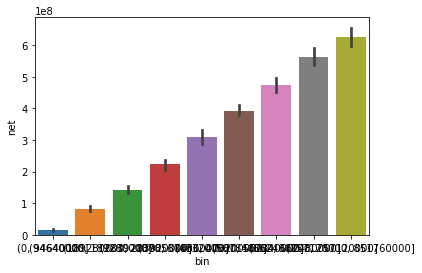

In [72]:

sns.barplot(x = 'bin', y = 'net', data = foreign_gt_domestic)
plt.show()

In [ ]:
sns.barplot(x = 'bin', y = 'net', data = domestic_gt_foreign)
plt.show()


In [73]:
domestic_gt_foreign['domestic_gross'].max()


700100000.0

In [75]:
domestic_gt_foreign['bin'] = pd.cut(domestic_gt_foreign['world_gross'], bins=range(0,946400000,94640000))
domestic_gt_foreign['bin']



<ipython-input-75-19f6ffe75b0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domestic_gt_foreign['bin'] = pd.cut(domestic_gt_foreign['world_gross'], bins=range(0,946400000,94640000))


1       (567840000, 662480000]
10       (94640000, 189280000]
19               (0, 94640000]
21      (189280000, 283920000]
22               (0, 94640000]
                 ...          
1091             (0, 94640000]
1092             (0, 94640000]
1093             (0, 94640000]
1095             (0, 94640000]
1096             (0, 94640000]
Name: bin, Length: 485, dtype: category
Categories (9, interval[int64]): [(0, 94640000] < (94640000, 189280000] < (189280000, 283920000] < (283920000, 378560000] ... (473200000, 567840000] < (567840000, 662480000] < (662480000, 757120000] < (757120000, 851760000]]

In [ ]:
df['foreign_bin'] = pd.cut(df['foreign_gross'] if df['foreign_vs_domestic'] == True, bins=range(0,946400000,94640000))
df['domestic_bin'] = pd.cut(df['domestic_gross'] if df['foreign_vs_domestic'] == False, bins=range(0,946400000,94640000))

In [76]:
domestic_gt_foreign['bin'].dropna()

1       (567840000, 662480000]
10       (94640000, 189280000]
19               (0, 94640000]
21      (189280000, 283920000]
22               (0, 94640000]
                 ...          
1091             (0, 94640000]
1092             (0, 94640000]
1093             (0, 94640000]
1095             (0, 94640000]
1096             (0, 94640000]
Name: bin, Length: 482, dtype: category
Categories (9, interval[int64]): [(0, 94640000] < (94640000, 189280000] < (189280000, 283920000] < (283920000, 378560000] ... (473200000, 567840000] < (567840000, 662480000] < (662480000, 757120000] < (757120000, 851760000]]

<ipython-input-78-acf3fbb7564c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreign_gt_domestic['ds'] = 'foreign_gt_domestic'
<ipython-input-78-acf3fbb7564c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domestic_gt_foreign['ds'] = 'domestic_gt_foreign'


<AxesSubplot:xlabel='bin', ylabel='net'>

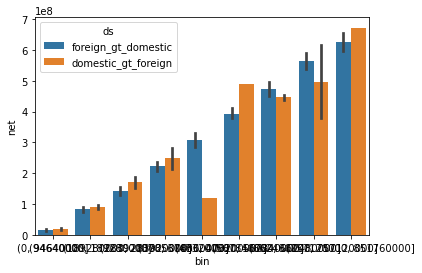

In [78]:
foreign_gt_domestic['ds'] = 'foreign_gt_domestic'
domestic_gt_foreign['ds'] = 'domestic_gt_foreign'
dss = pd.concat([foreign_gt_domestic, domestic_gt_foreign])
sns.barplot(x='bin', y='net', hue='ds', data=dss)


#ds2['ds'] = 'dataset_2'
#ds1['ds'] = 'dataset_1'
#dss = pd.concat([ds1, ds2])
#sns.barplot(x='day', y='total_bill', hue='ds', data=dss)

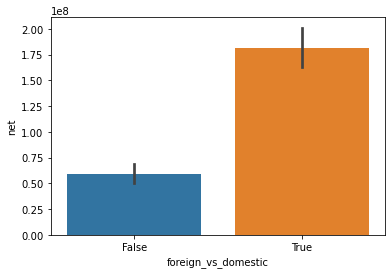

In [79]:
sns.barplot(x = 'foreign_vs_domestic', y = 'net', data = df)
plt.show()

# foreign-dominated genres

In [91]:
foreign_gt_domestic['genre_list'] = foreign_gt_domestic.genres.str.split(",")

foreign_gt_domestic

<ipython-input-91-3659dc2e03bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreign_gt_domestic['genre_list'] = foreign_gt_domestic.genres.str.split(",")


,movie_id,primary_title,original_title,genres,release_year,release_date_y,studio,domestic_gross,foreign_gross,production_budget,runtime_minutes,averagerating,numvotes,original_language,world_gross,net,bin,ds,genre_list
0,tt0892769,How to Train Your Dragon,How to Train Your Dragon,"Action,Adventure,Animation",2010,2010-03-26,P/DW,217600000.0,277300000.0,165000000.0,98.0,8.1,611299.0,en,4.949000e+08,329900000.0,"(473200000.0, 567840000.0]",foreign_gt_domestic,"[Action, Adventure, Animation]"
2,tt1375666,Inception,Inception,"Action,Adventure,Sci-Fi",2010,2010-07-16,WB,292600000.0,535700000.0,160000000.0,148.0,8.8,1841066.0,en,8.283000e+08,668300000.0,"(757120000.0, 851760000.0]",foreign_gt_domestic,"[Action, Adventure, Sci-Fi]"
3,tt0435761,Toy Story 3,Toy Story 3,"Adventure,Animation,Comedy",2010,2010-06-18,BV,415000000.0,652000000.0,200000000.0,103.0,8.3,682218.0,en,1.067000e+09,867000000.0,NaN,foreign_gt_domestic,"[Adventure, Animation, Comedy]"
4,tt1323594,Despicable Me,Despicable Me,"Animation,Comedy,Family",2010,2010-07-09,Uni.,251500000.0,291600000.0,69000000.0,95.0,7.7,464511.0,en,5.431000e+08,474100000.0,"(473200000.0, 567840000.0]",foreign_gt_domestic,"[Animation, Comedy, Family]"
5,tt1001526,Megamind,Megamind,"Action,Animation,Comedy",2010,2010-11-05,P/DW,148400000.0,173500000.0,130000000.0,95.0,7.3,207488.0,en,3.219000e+08,191900000.0,"(283920000.0, 378560000.0]",foreign_gt_domestic,"[Action, Animation, Comedy]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,NaN,NaN,The Sisters Brothers,NaN,2018,2018-09-21,Annapurna,3100000.0,10000000.0,38000000.0,NaN,NaN,NaN,en,1.310000e+07,-24900000.0,"(0.0, 94640000.0]",foreign_gt_domestic,NaN
1082,tt1981128,Geostorm,Geostorm,"Action,Sci-Fi,Thriller",2017,2017-10-20,WB,33700000.0,187900000.0,100000000.0,109.0,5.3,78287.0,en,2.216000e+08,121600000.0,"(189280000.0, 283920000.0]",foreign_gt_domestic,"[Action, Sci-Fi, Thriller]"
1086,tt2296777,Sherlock Gnomes,Sherlock Gnomes,"Adventure,Animation,Comedy",2018,2018-03-23,Par.,43200000.0,47100000.0,59000000.0,86.0,5.1,8030.0,en,9.030000e+07,31300000.0,"(0.0, 94640000.0]",foreign_gt_domestic,"[Adventure, Animation, Comedy]"
1094,tt1389072,Downsizing,Downsizing,"Drama,Sci-Fi",2017,2017-12-22,Par.,24400000.0,30600000.0,68000000.0,135.0,5.7,74815.0,en,5.500000e+07,-13000000.0,"(0.0, 94640000.0]",foreign_gt_domestic,"[Drama, Sci-Fi]"


In [92]:
foreign_gt_domestic['genre_list'].dropna(inplace=True)

<ipython-input-92-8049a494bf0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreign_gt_domestic['genre_list'].dropna(inplace=True)


In [93]:
exploded_genres = foreign_gt_domestic.explode('genre_list')
exploded_genres 


,movie_id,primary_title,original_title,genres,release_year,release_date_y,studio,domestic_gross,foreign_gross,production_budget,runtime_minutes,averagerating,numvotes,original_language,world_gross,net,bin,ds,genre_list
0,tt0892769,How to Train Your Dragon,How to Train Your Dragon,"Action,Adventure,Animation",2010,2010-03-26,P/DW,217600000.0,277300000.0,165000000.0,98.0,8.1,611299.0,en,494900000.0,329900000.0,"(473200000, 567840000]",foreign_gt_domestic,Action
0,tt0892769,How to Train Your Dragon,How to Train Your Dragon,"Action,Adventure,Animation",2010,2010-03-26,P/DW,217600000.0,277300000.0,165000000.0,98.0,8.1,611299.0,en,494900000.0,329900000.0,"(473200000, 567840000]",foreign_gt_domestic,Adventure
0,tt0892769,How to Train Your Dragon,How to Train Your Dragon,"Action,Adventure,Animation",2010,2010-03-26,P/DW,217600000.0,277300000.0,165000000.0,98.0,8.1,611299.0,en,494900000.0,329900000.0,"(473200000, 567840000]",foreign_gt_domestic,Animation
2,tt1375666,Inception,Inception,"Action,Adventure,Sci-Fi",2010,2010-07-16,WB,292600000.0,535700000.0,160000000.0,148.0,8.8,1841066.0,en,828300000.0,668300000.0,"(757120000, 851760000]",foreign_gt_domestic,Action
2,tt1375666,Inception,Inception,"Action,Adventure,Sci-Fi",2010,2010-07-16,WB,292600000.0,535700000.0,160000000.0,148.0,8.8,1841066.0,en,828300000.0,668300000.0,"(757120000, 851760000]",foreign_gt_domestic,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,tt2296777,Sherlock Gnomes,Sherlock Gnomes,"Adventure,Animation,Comedy",2018,2018-03-23,Par.,43200000.0,47100000.0,59000000.0,86.0,5.1,8030.0,en,90300000.0,31300000.0,"(0, 94640000]",foreign_gt_domestic,Animation
1086,tt2296777,Sherlock Gnomes,Sherlock Gnomes,"Adventure,Animation,Comedy",2018,2018-03-23,Par.,43200000.0,47100000.0,59000000.0,86.0,5.1,8030.0,en,90300000.0,31300000.0,"(0, 94640000]",foreign_gt_domestic,Comedy
1094,tt1389072,Downsizing,Downsizing,"Drama,Sci-Fi",2017,2017-12-22,Par.,24400000.0,30600000.0,68000000.0,135.0,5.7,74815.0,en,55000000.0,-13000000.0,"(0, 94640000]",foreign_gt_domestic,Drama
1094,tt1389072,Downsizing,Downsizing,"Drama,Sci-Fi",2017,2017-12-22,Par.,24400000.0,30600000.0,68000000.0,135.0,5.7,74815.0,en,55000000.0,-13000000.0,"(0, 94640000]",foreign_gt_domestic,Sci-Fi


<AxesSubplot:xlabel='genre_list', ylabel='net'>

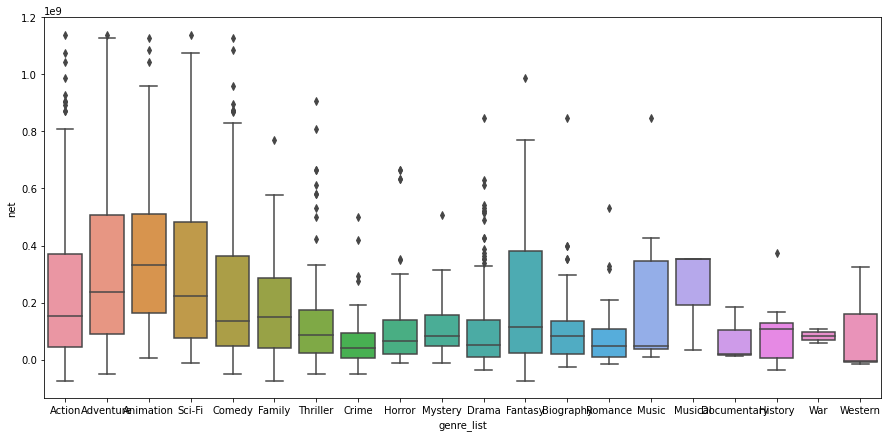

In [100]:
fig, ax = plt.subplots(figsize=(15,7))

sns.boxplot(x='genre_list', y='net', data=exploded_genres)

In [192]:
top_genres = exploded_genres.loc[(exploded_genres['genre_list'] == 'Action') | 
                                 (exploded_genres['genre_list'] == 'Adventure')|
                                 (exploded_genres['genre_list'] == 'Animation')|
                                 (exploded_genres['genre_list'] == 'Sci-Fi')|
                                 (exploded_genres['genre_list'] == 'Comedy')|
                                 (exploded_genres['genre_list'] == 'Family')
                                ]


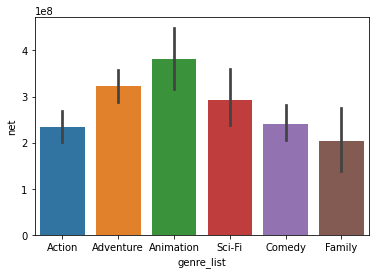

In [193]:
sns.barplot(x='genre_list', y = 'net', data=top_genres)
plt.show()

In [142]:
genre_net = pd.DataFrame().assign(Genres=exploded_genres['genre_list'], Net=exploded_genres['net'])
genre_net

,Genres,Net
0,Action,329900000.0
0,Adventure,329900000.0
0,Animation,329900000.0
2,Action,668300000.0
2,Adventure,668300000.0
...,...,...
1086,Animation,31300000.0
1086,Comedy,31300000.0
1094,Drama,-13000000.0
1094,Sci-Fi,-13000000.0


# Looking at top genre groupings by top exploded genres


In [110]:
exploded_families = exploded_genres.loc[exploded_genres['genre_list'] == 'Family']

In [112]:
exploded_families['genres'].value_counts()

Adventure,Family,Fantasy      7
Animation,Comedy,Family       6
Action,Adventure,Family       4
Adventure,Comedy,Family       3
Comedy,Family                 2
Adventure,Drama,Family        2
Drama,Family                  2
Action,Drama,Family           2
Adventure,Animation,Family    2
Comedy,Family,Romance         1
Action,Family,Fantasy         1
Action,Comedy,Family          1
Comedy,Family,Fantasy         1
Name: genres, dtype: int64

In [131]:
# only looking at family permutations
net_exploded_families = exploded_families['genres'].groupby(exploded_families['net']).sum().tail(5)
net_exploded_families

net
453700000.0                          Adventure,Family,Fantasy
474100000.0                           Animation,Comedy,Family
559200000.0    Animation,Comedy,FamilyAnimation,Comedy,Family
578500000.0                           Action,Adventure,Family
771100000.0                          Adventure,Family,Fantasy
Name: genres, dtype: object

In [113]:
#only looking at action permutations
exploded_action = exploded_genres.loc[exploded_genres['genre_list'] == 'Action']

In [178]:
net_exploded_action = exploded_action['genres'].groupby(exploded_action['net']).sum().tail(5)
net_exploded_action

net
9.288000e+08       Action,Adventure,Sci-Fi
9.878000e+08      Action,Adventure,Fantasy
1.042800e+09    Action,Adventure,Animation
1.074800e+09       Action,Adventure,Sci-Fi
1.139500e+09       Action,Adventure,Sci-Fi
Name: genres, dtype: object

In [177]:
test3 = df.loc[df['genres'] == 'Action,Adventure,Sci-Fi']
test3['net'].sort_values(ascending=False)

993     1.147000e+09
1002    1.139500e+09
614     1.074800e+09
279     9.288000e+08
739     9.033000e+08
530     8.940000e+08
409     7.350000e+08
877     7.052000e+08
2       6.683000e+08
516     6.303000e+08
321     6.144000e+08
513     5.478000e+08
543     5.443000e+08
288     5.379000e+08
532     5.090000e+08
758     4.934000e+08
637     4.934000e+08
1       4.539000e+08
401     4.430000e+08
631     4.373010e+08
1009    4.329000e+08
892     3.885000e+08
989     3.788014e+08
995     3.660000e+08
738     3.659000e+08
507     2.999000e+08
407     2.774000e+08
430     2.357000e+08
153     2.306000e+08
618     2.284000e+08
788     2.246000e+08
419     2.210000e+08
412     1.662000e+08
760     1.584000e+08
15      8.720000e+07
290     8.300000e+07
417     6.030000e+07
162     1.990000e+07
296     9.200000e+06
626     5.000000e+06
Name: net, dtype: float64

In [160]:
df.loc[df['net'] == 1.147000e+09]

,movie_id,primary_title,original_title,genres,release_year,release_date_y,studio,domestic_gross,foreign_gross,production_budget,runtime_minutes,averagerating,numvotes,original_language,world_gross,net,foreign_vs_domestic
993,tt1825683,Black Panther,Black Panther,"Action,Adventure,Sci-Fi",2018,2018-02-16,BV,700100000.0,646900000.0,200000000.0,134.0,7.3,516148.0,en,1.347000e+09,1.147000e+09,False


In [133]:
#only looking at adventure permutations
exploded_adventure = exploded_genres.loc[exploded_genres['genre_list'] == 'Adventure']

In [135]:
net_exploded_adventure = exploded_adventure['genres'].groupby(exploded_action['net']).sum().tail(5)
net_exploded_adventure

net
9.288000e+08       Action,Adventure,Sci-Fi
9.878000e+08      Action,Adventure,Fantasy
1.042800e+09    Action,Adventure,Animation
1.074800e+09       Action,Adventure,Sci-Fi
1.139500e+09       Action,Adventure,Sci-Fi
Name: genres, dtype: object

In [179]:
# only looking at animation, sci-fi, comedy, permutations
exploded_animation = exploded_genres.loc[exploded_genres['genre_list'] == 'Animation']
exploded_sci_fi = exploded_genres.loc[exploded_genres['genre_list'] == 'Sci-Fi']
exploded_comedy = exploded_genres.loc[exploded_genres['genre_list'] == 'Comedy']
net_exploded_animation = exploded_animation['genres'].groupby(exploded_action['net']).sum().tail(5)
net_exploded_sci_fi = exploded_sci_fi['genres'].groupby(exploded_sci_fi['net']).sum().tail(5)
net_exploded_comedy = exploded_sci_fi['genres'].groupby(exploded_comedy['net']).sum().tail(5)

In [152]:
net_exploded_animation

net
4.522000e+08                           Action,Adventure,Animation
4.765000e+08                           Action,Adventure,Animation
4.928000e+08    Action,Adventure,AnimationAction,Adventure,Ani...
5.156000e+08                           Action,Adventure,Animation
1.042800e+09                           Action,Adventure,Animation
Name: genres, dtype: object

In [153]:
net_exploded_sci_fi

net
8.940000e+08    Action,Adventure,Sci-Fi
9.033000e+08    Action,Adventure,Sci-Fi
9.288000e+08    Action,Adventure,Sci-Fi
1.074800e+09    Action,Adventure,Sci-Fi
1.139500e+09    Action,Adventure,Sci-Fi
Name: genres, dtype: object

In [180]:
net_exploded_comedy

net
-7200000.0         Action,Comedy,Sci-Fi
 58000000.0     Adventure,Comedy,Sci-Fi
 154800000.0       Action,Comedy,Sci-Fi
Name: genres, dtype: object

In [162]:
exploded_genres['genre_list'].value_counts()

Action         227
Adventure      222
Drama          218
Comedy         156
Thriller       115
Sci-Fi          74
Animation       74
Crime           70
Fantasy         61
Horror          60
Mystery         52
Romance         49
Biography       47
Family          34
History         21
Music           10
Western          3
Documentary      3
Musical          3
War              2
Name: genre_list, dtype: int64

In [166]:
AAA  = foreign_gt_domestic.loc[foreign_gt_domestic['genres'] == 'Action,Adventure,Animation']

In [171]:
AAS  = foreign_gt_domestic.loc[foreign_gt_domestic['genres'] == 'Action,Adventure,Sci-Fi']
AAS

,movie_id,primary_title,original_title,genres,release_year,release_date_y,studio,domestic_gross,foreign_gross,production_budget,runtime_minutes,averagerating,numvotes,original_language,world_gross,net,bin,ds,genre_list
2,tt1375666,Inception,Inception,"Action,Adventure,Sci-Fi",2010,2010-07-16,WB,292600000.0,535700000.0,160000000.0,148.0,8.8,1841066.0,en,8.283000e+08,6.683000e+08,"(757120000.0, 851760000.0]",foreign_gt_domestic,"[Action, Adventure, Sci-Fi]"
15,tt1424381,Predators,Predators,"Action,Adventure,Sci-Fi",2010,2010-07-09,Fox,52000000.0,75200000.0,40000000.0,107.0,6.4,199764.0,en,1.272000e+08,8.720000e+07,"(94640000.0, 189280000.0]",foreign_gt_domestic,"[Action, Adventure, Sci-Fi]"
153,tt0458339,Captain America: The First Avenger,Captain America: The First Avenger,"Action,Adventure,Sci-Fi",2011,2011-07-22,Par.,176700000.0,193900000.0,140000000.0,124.0,6.9,668137.0,en,3.706000e+08,2.306000e+08,"(283920000.0, 378560000.0]",foreign_gt_domestic,"[Action, Adventure, Sci-Fi]"
279,tt1399103,Transformers: Dark of the Moon,Transformers: Dark of the Moon,"Action,Adventure,Sci-Fi",2011,2011-06-29,P/DW,352400000.0,771400000.0,195000000.0,154.0,6.2,366409.0,en,1.123800e+09,9.288000e+08,NaN,foreign_gt_domestic,"[Action, Adventure, Sci-Fi]"
288,tt0948470,The Amazing Spider-Man,The Amazing Spider-Man,"Action,Adventure,Sci-Fi",2012,2012-07-03,Sony,262000000.0,495900000.0,220000000.0,136.0,7.0,525632.0,en,7.579000e+08,5.379000e+08,"(757120000.0, 851760000.0]",foreign_gt_domestic,"[Action, Adventure, Sci-Fi]"
290,tt1440129,Battleship,Battleship,"Action,Adventure,Sci-Fi",2012,2012-05-18,Uni.,65400000.0,237600000.0,220000000.0,131.0,5.8,225342.0,en,3.030000e+08,8.300000e+07,"(283920000.0, 378560000.0]",foreign_gt_domestic,"[Action, Adventure, Sci-Fi]"
296,tt0401729,John Carter,John Carter,"Action,Adventure,Sci-Fi",2012,2012-03-09,BV,73100000.0,211100000.0,275000000.0,132.0,6.6,241792.0,en,2.842000e+08,9.200000e+06,"(283920000.0, 378560000.0]",foreign_gt_domestic,"[Action, Adventure, Sci-Fi]"
401,tt0770828,Man of Steel,Man of Steel,"Action,Adventure,Sci-Fi",2013,2013-06-14,WB,291000000.0,377000000.0,225000000.0,143.0,7.1,647288.0,en,6.680000e+08,4.430000e+08,"(662480000.0, 757120000.0]",foreign_gt_domestic,"[Action, Adventure, Sci-Fi]"
407,tt1408101,Star Trek Into Darkness,Star Trek Into Darkness,"Action,Adventure,Sci-Fi",2013,2013-05-16,Par.,228800000.0,238600000.0,190000000.0,132.0,7.7,445535.0,en,4.674000e+08,2.774000e+08,"(378560000.0, 473200000.0]",foreign_gt_domestic,"[Action, Adventure, Sci-Fi]"
409,tt1951264,The Hunger Games: Catching Fire,The Hunger Games: Catching Fire,"Action,Adventure,Sci-Fi",2013,2013-11-22,LGF,424700000.0,440300000.0,130000000.0,146.0,7.5,575455.0,en,8.650000e+08,7.350000e+08,NaN,foreign_gt_domestic,"[Action, Adventure, Sci-Fi]"


In [181]:
top_genre_combos = foreign_gt_domestic.copy()

In [195]:
top_genre_combos = top_genre_combos.loc[(top_genre_combos['genres'] == 'Action,Adventure,Sci-Fi') | 
                     (top_genre_combos['genres'] == 'Action,Comedy,Sci-Fi') | 
                     (top_genre_combos['genres'] == 'Action,Adventure,Animation') | 
                     (top_genre_combos['genres'] == 'Adventure,Family,Fantasy')]
top_genre_combos['genres'].value_counts()

Action,Adventure,Sci-Fi       34
Action,Adventure,Animation    12
Adventure,Family,Fantasy       7
Action,Comedy,Sci-Fi           2
Name: genres, dtype: int64

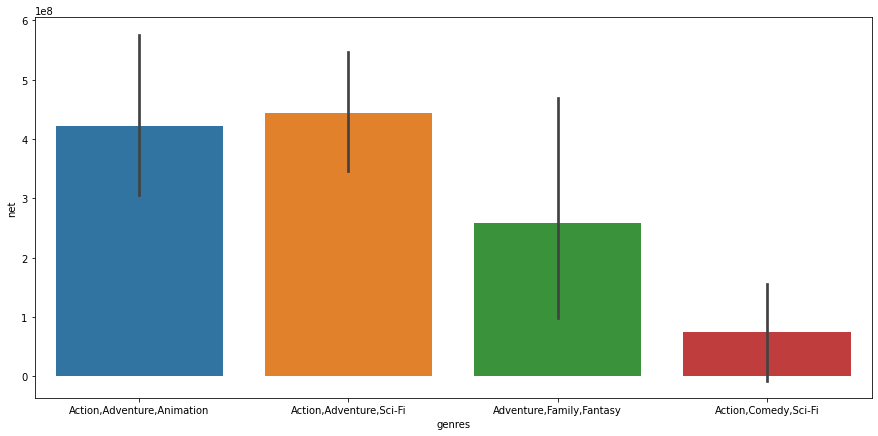

In [190]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='genres', y='net', data=top_genre_combos)
plt.show()
